# **Energy**

<h1 style="font-weight: bold; background: linear-gradient(to right, teal, skyblue); -webkit-background-clip: text; color: transparent;"> Matrix Symmetry:
</h1>

- $ A = A^T $ (Symmetric Matrix)

<h1 style="font-weight: bold; background: linear-gradient(to right, teal, skyblue); -webkit-background-clip: text; color: transparent;"> Quadratic Form (Energy):
</h1>

- $ x^T A x $
- $ x^T A x > 0 $: Positive quadratic form (energy positive)
- $ x^T A x < 0 $: Negative quadratic form (energy negative)
- $ x^T A x = 0 $: Zero quadratic form (system in equilibrium)

<h1 style="font-weight: bold; background: linear-gradient(to right, teal, skyblue); -webkit-background-clip: text; color: transparent;"> Eigenvalues:
</h1>

- Eigenvalue equation: $ A v = \lambda v $

---

<h2 style="font-weight: bold; background: linear-gradient(to right, magenta, cyan); -webkit-background-clip: text; color: transparent;"> 1. Positive Definite Matrix
</h2>

- $ A = A^T $, $ x^T A x > 0 $ for all $ x \neq 0 $
- **Eigenvalues**: All positive
- **Energy**: Always positive energy.

<h2 style="font-weight: bold; background: linear-gradient(to right, magenta, cyan); -webkit-background-clip: text; color: transparent;"> 2. Negative Definite Matrix
</h2>

- $ A = A^T $, $ x^T A x < 0 $ for all $ x \neq 0 $
- **Eigenvalues**: All negative
- **Energy**: Always negative energy.

<h2 style="font-weight: bold; background: linear-gradient(to right, magenta, cyan); -webkit-background-clip: text; color: transparent;"> 3. Indefinite Matrix
</h2>

- $ A = A^T $, quadratic form can be both positive and negative
- **Eigenvalues**: Mixed positive and negative
- **Energy**: Energy can be both positive and negative.

<h2 style="font-weight: bold; background: linear-gradient(to right, magenta, cyan); -webkit-background-clip: text; color: transparent;"> 4. Positive Semi-Definite Matrix
</h2>

- $ A = A^T $, $ x^T A x \geq 0 $ for all $ x $
- **Eigenvalues**: Non-negative
- **Energy**: Non-negative energy.

<h2 style="font-weight: bold; background: linear-gradient(to right, magenta, cyan); -webkit-background-clip: text; color: transparent;"> 5. Negative Semi-Definite Matrix
</h2>

- $ A = A^T $, $ x^T A x \leq 0 $ for all $ x $
- **Eigenvalues**: Non-positive
- **Energy**: Non-positive energy.


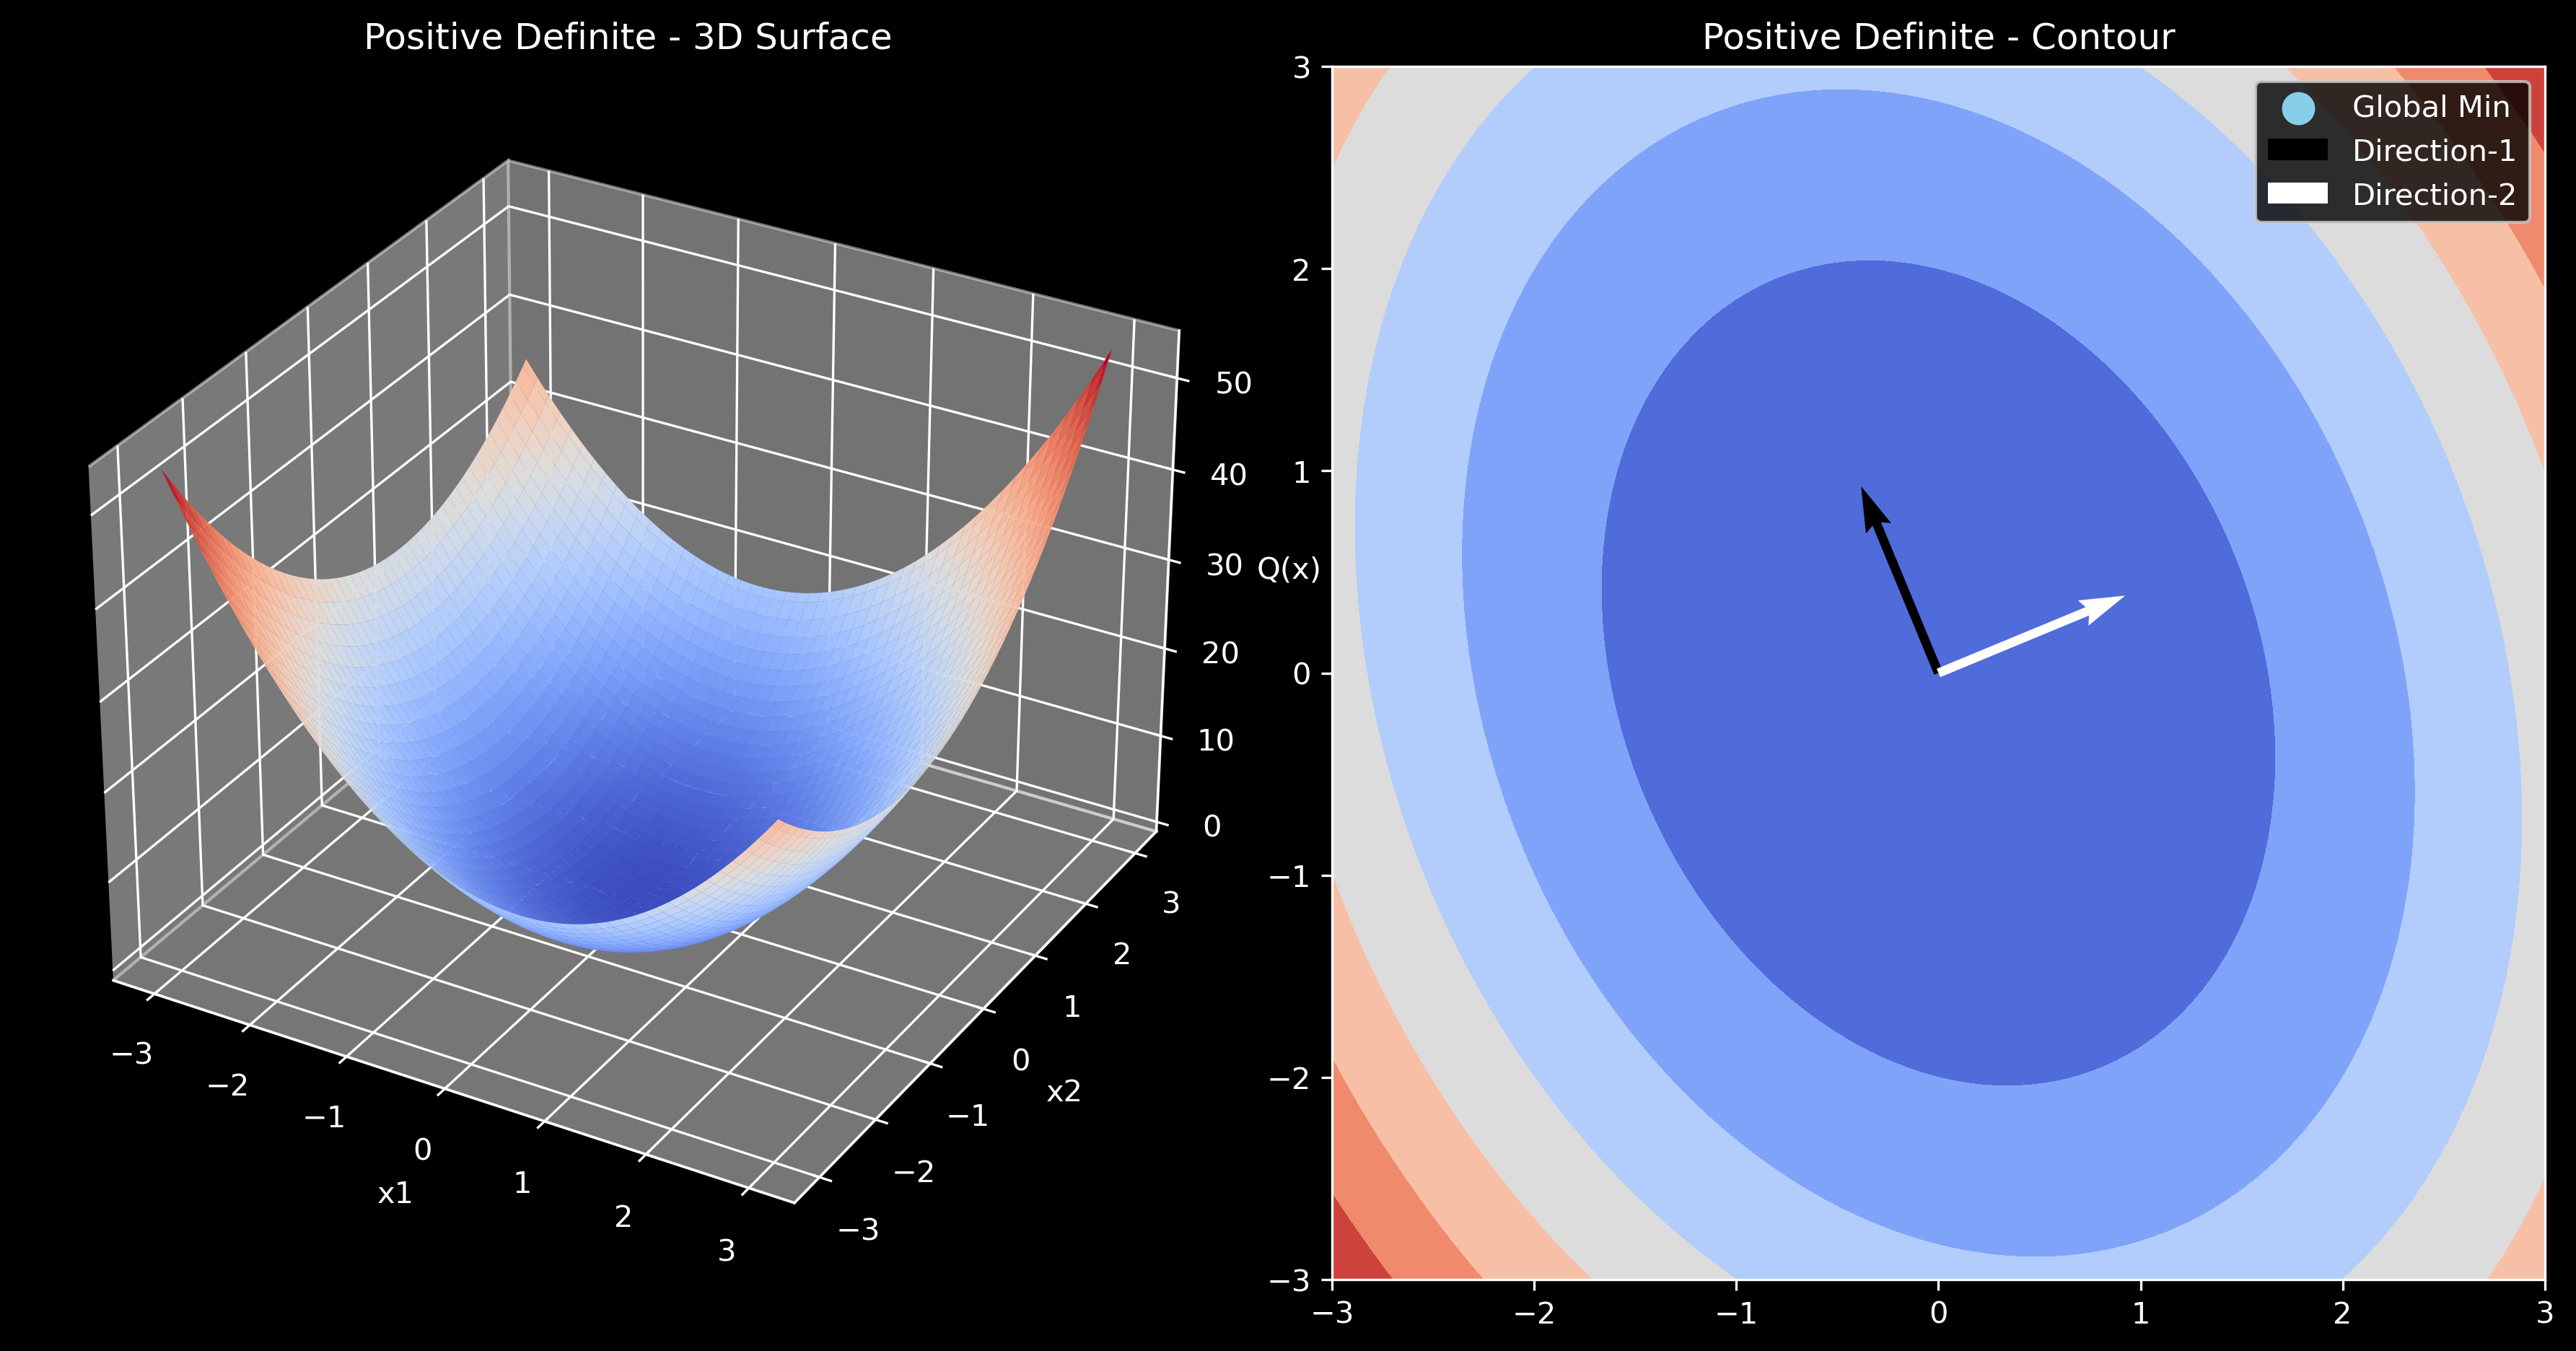

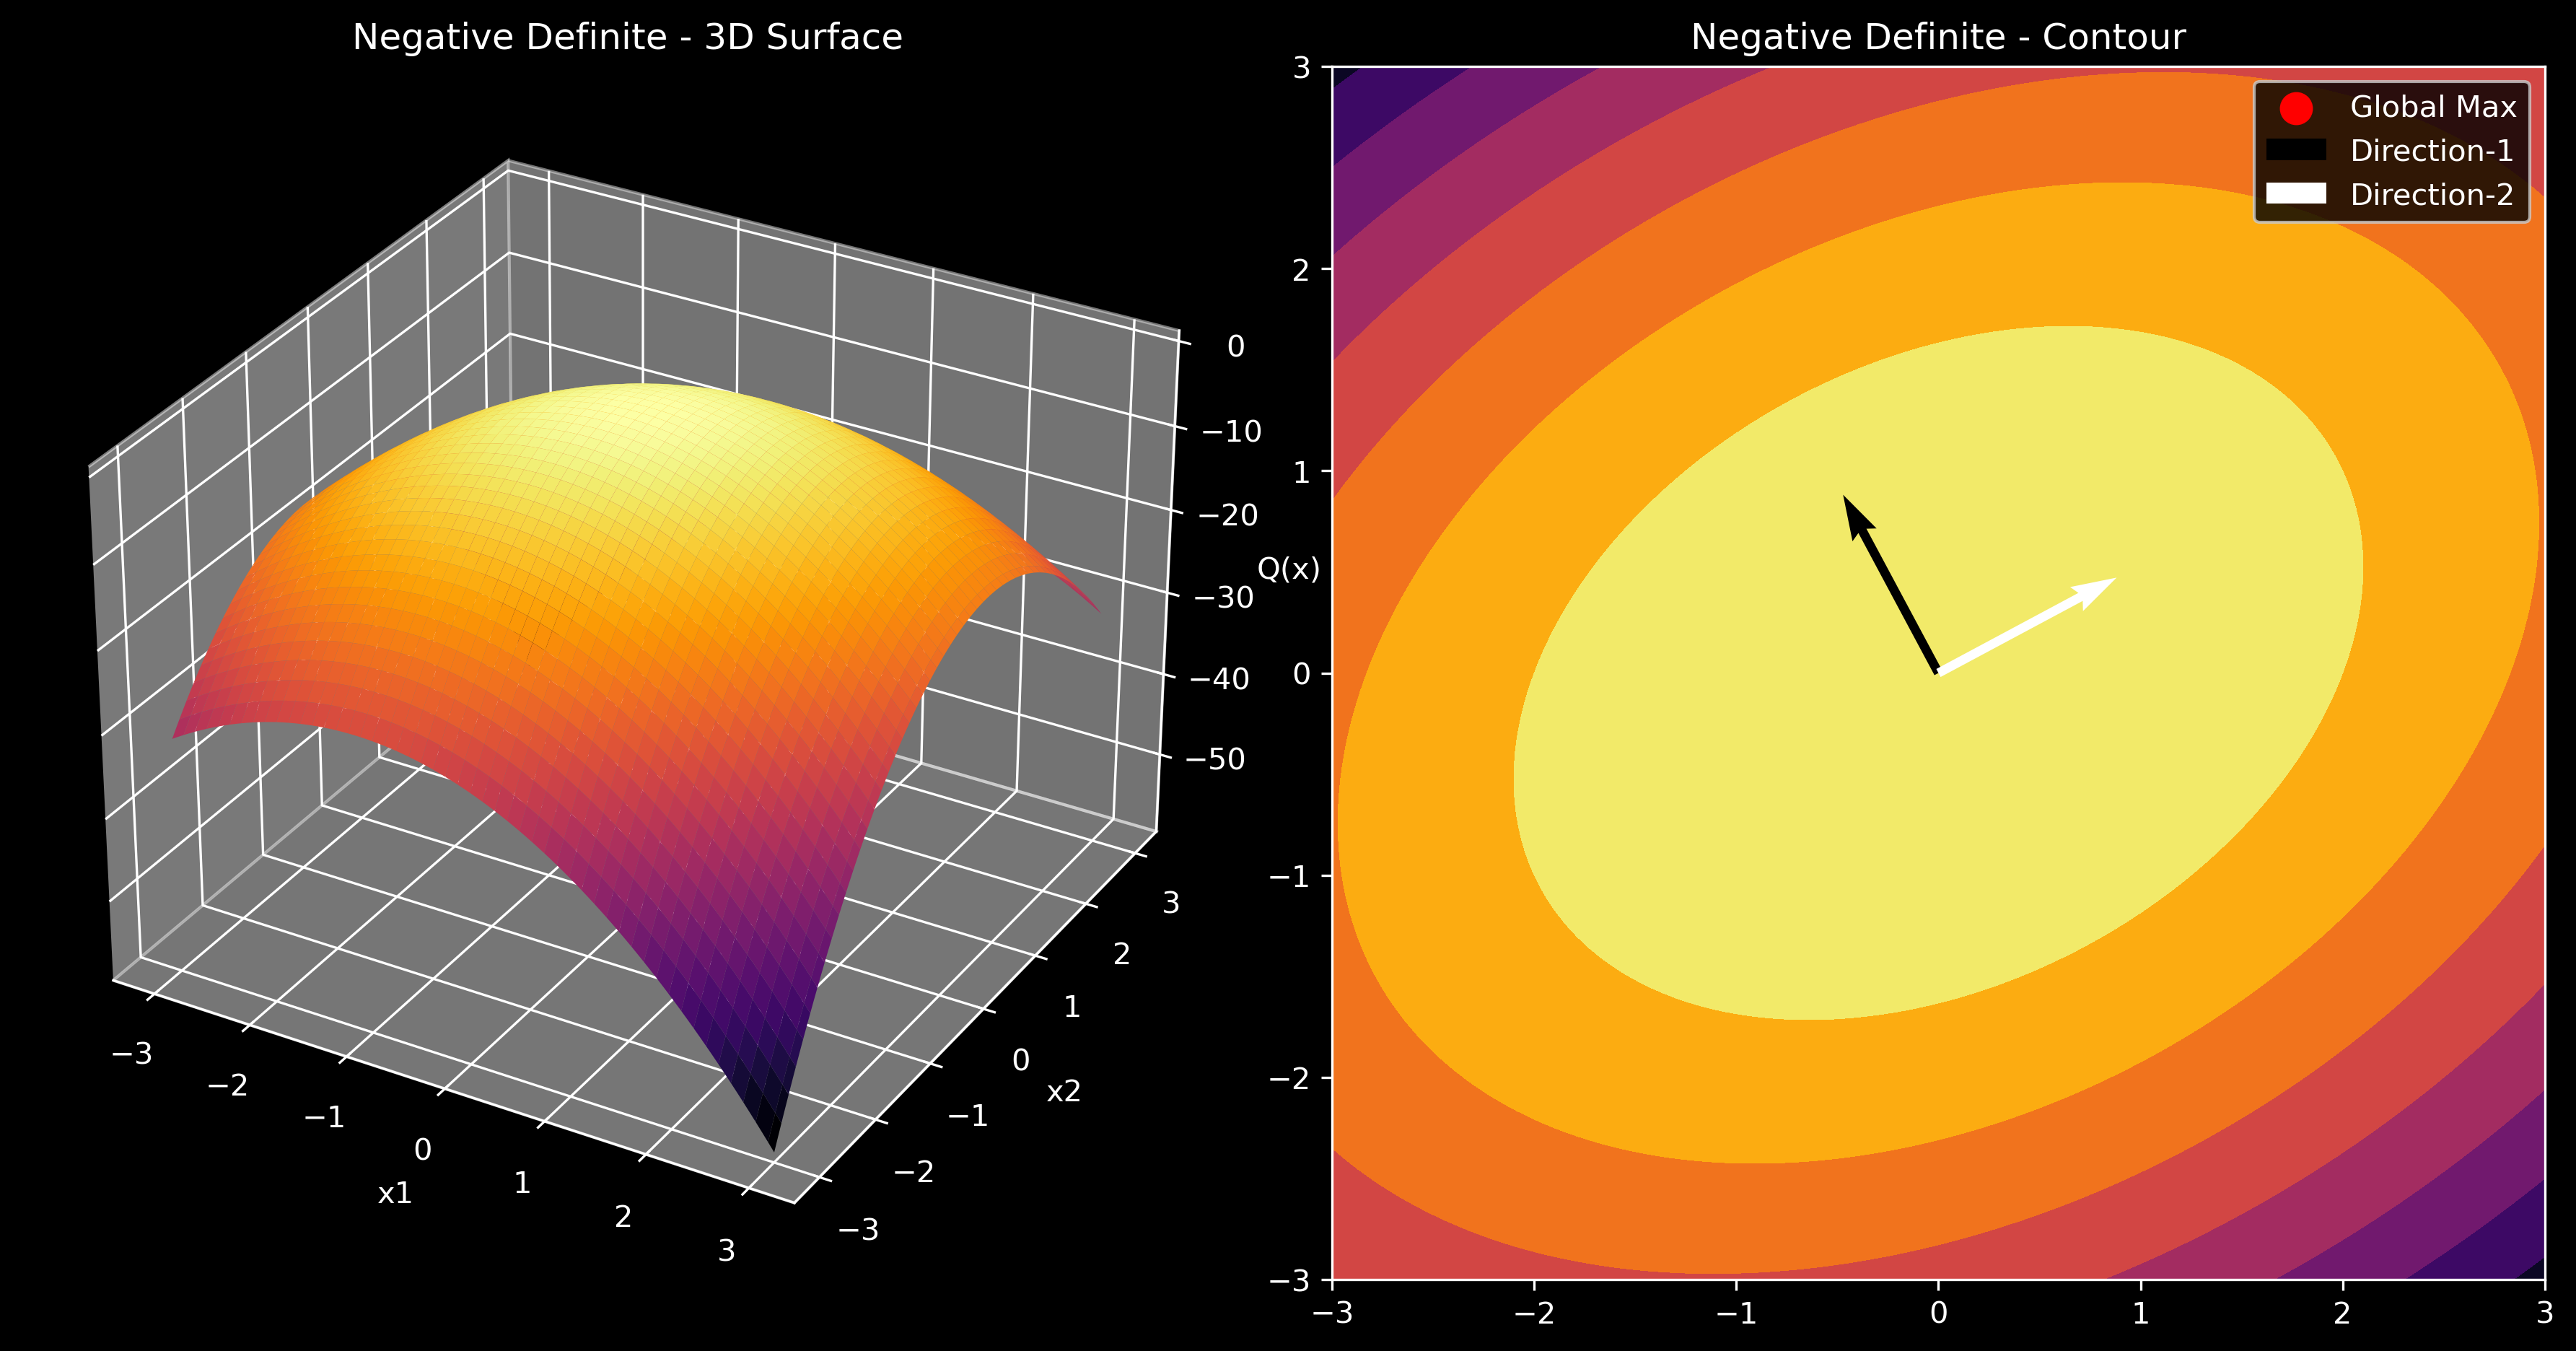

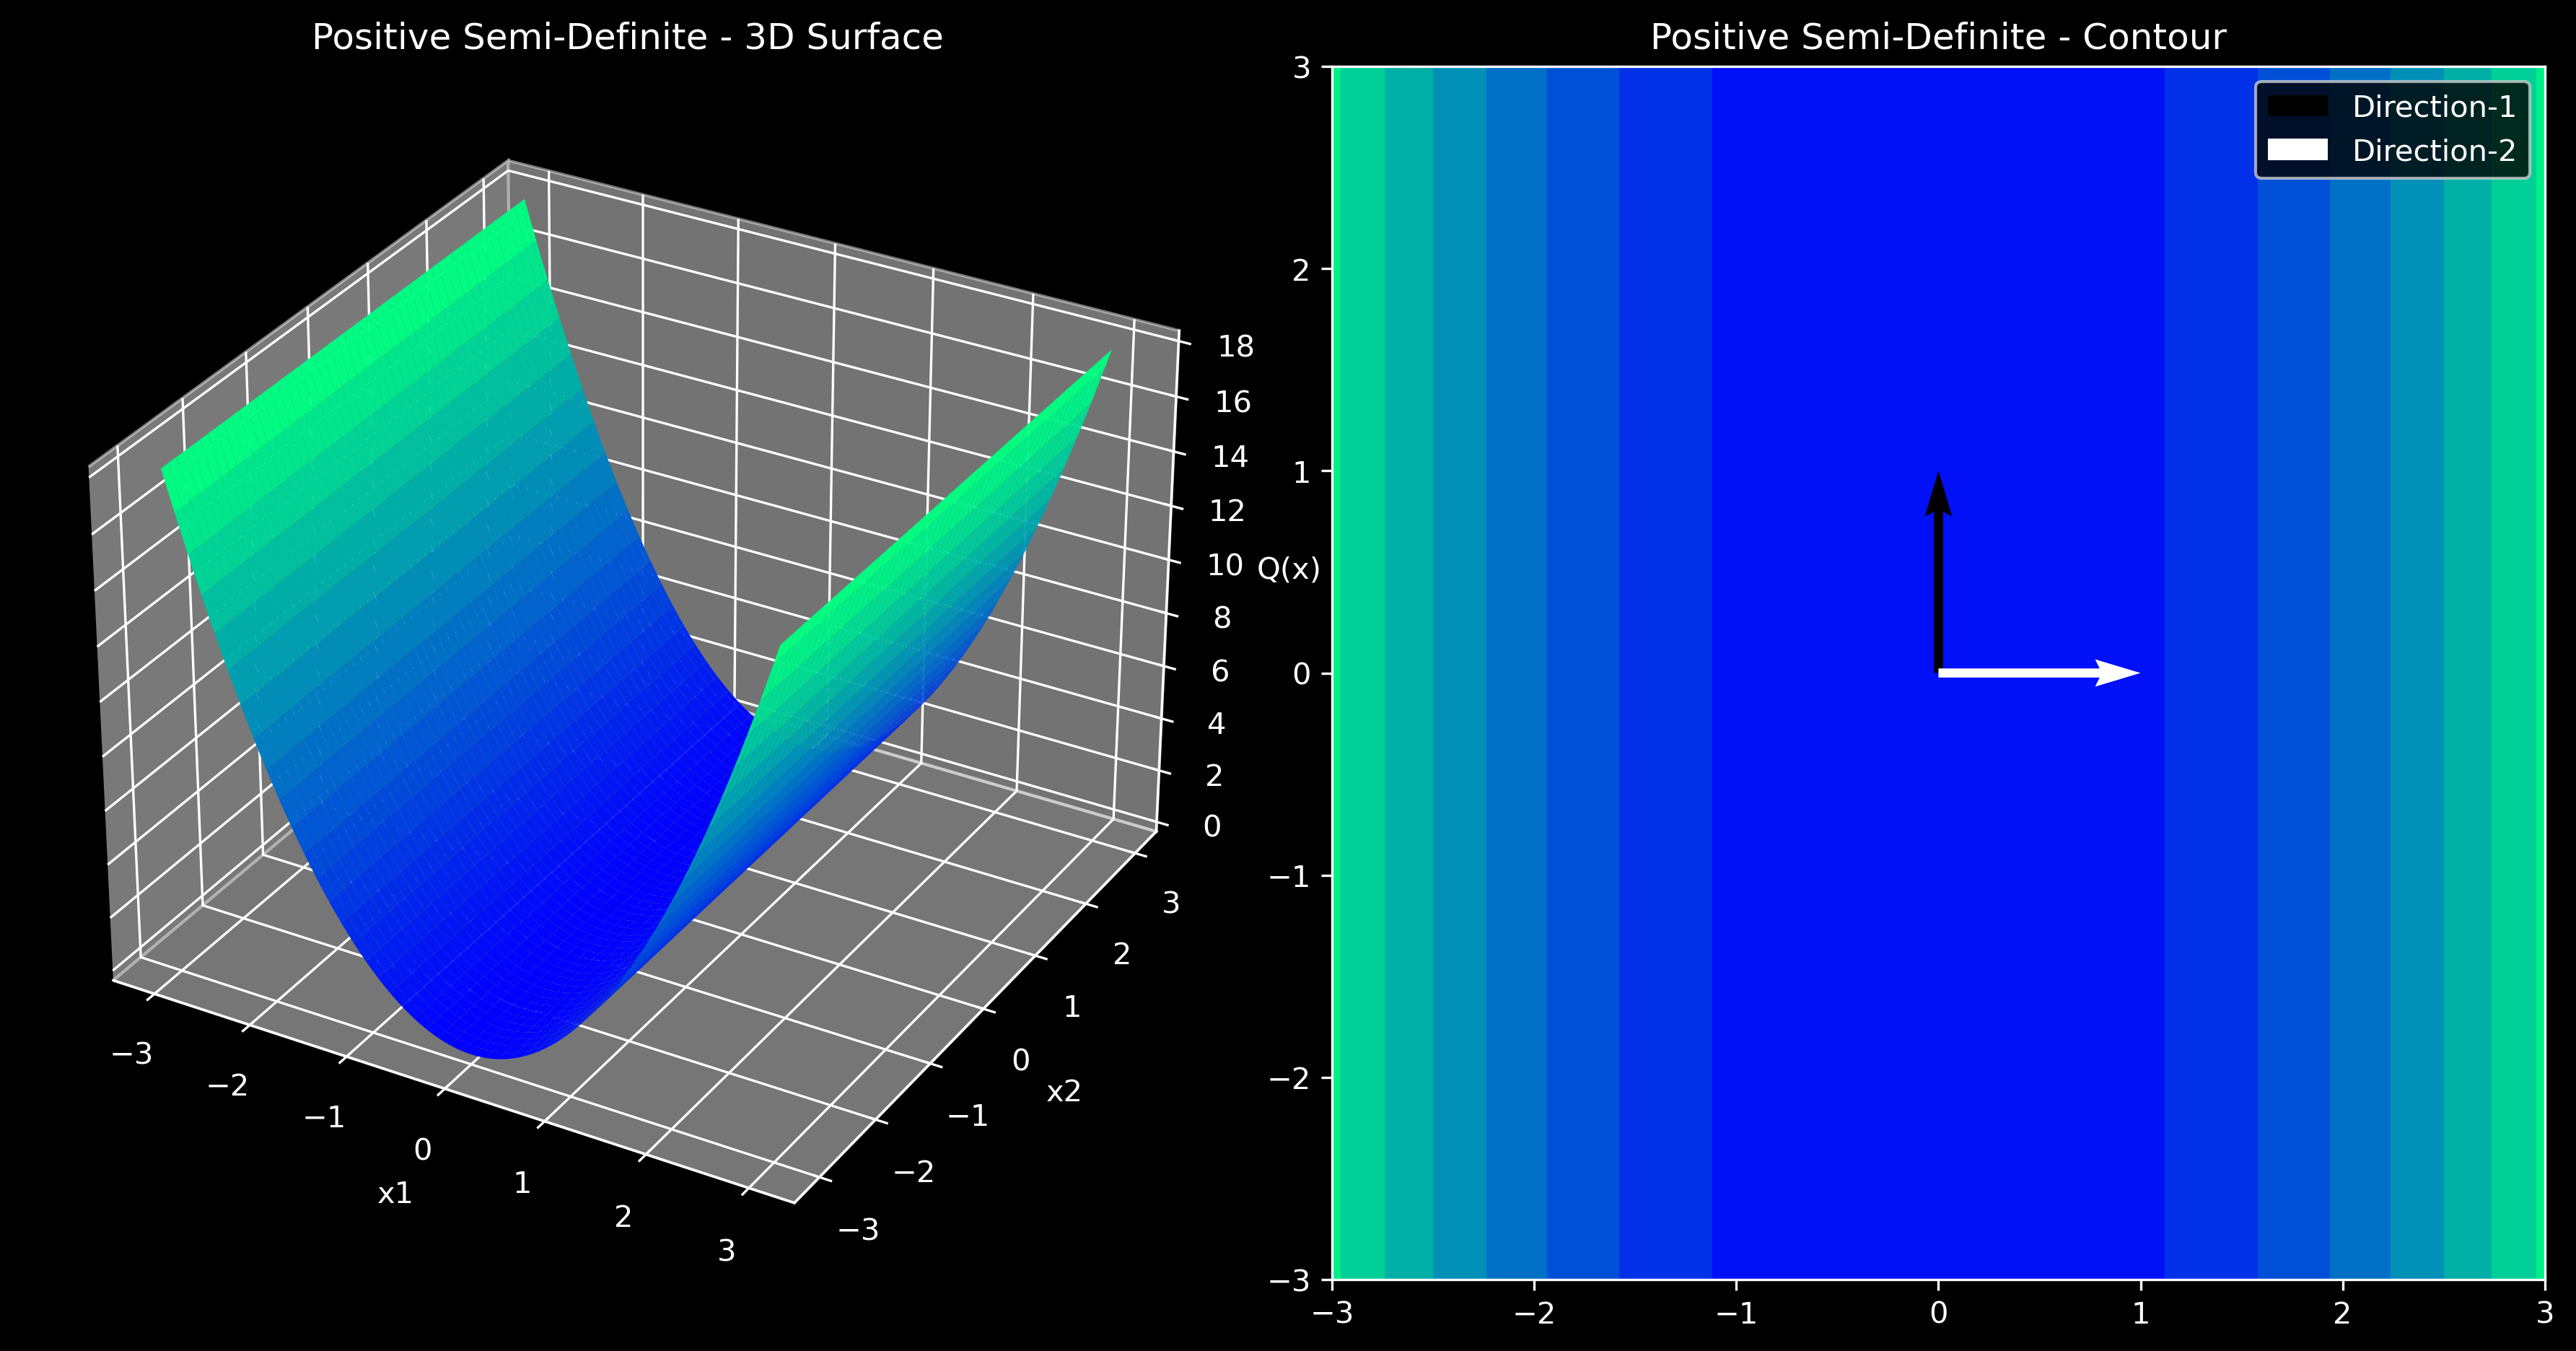

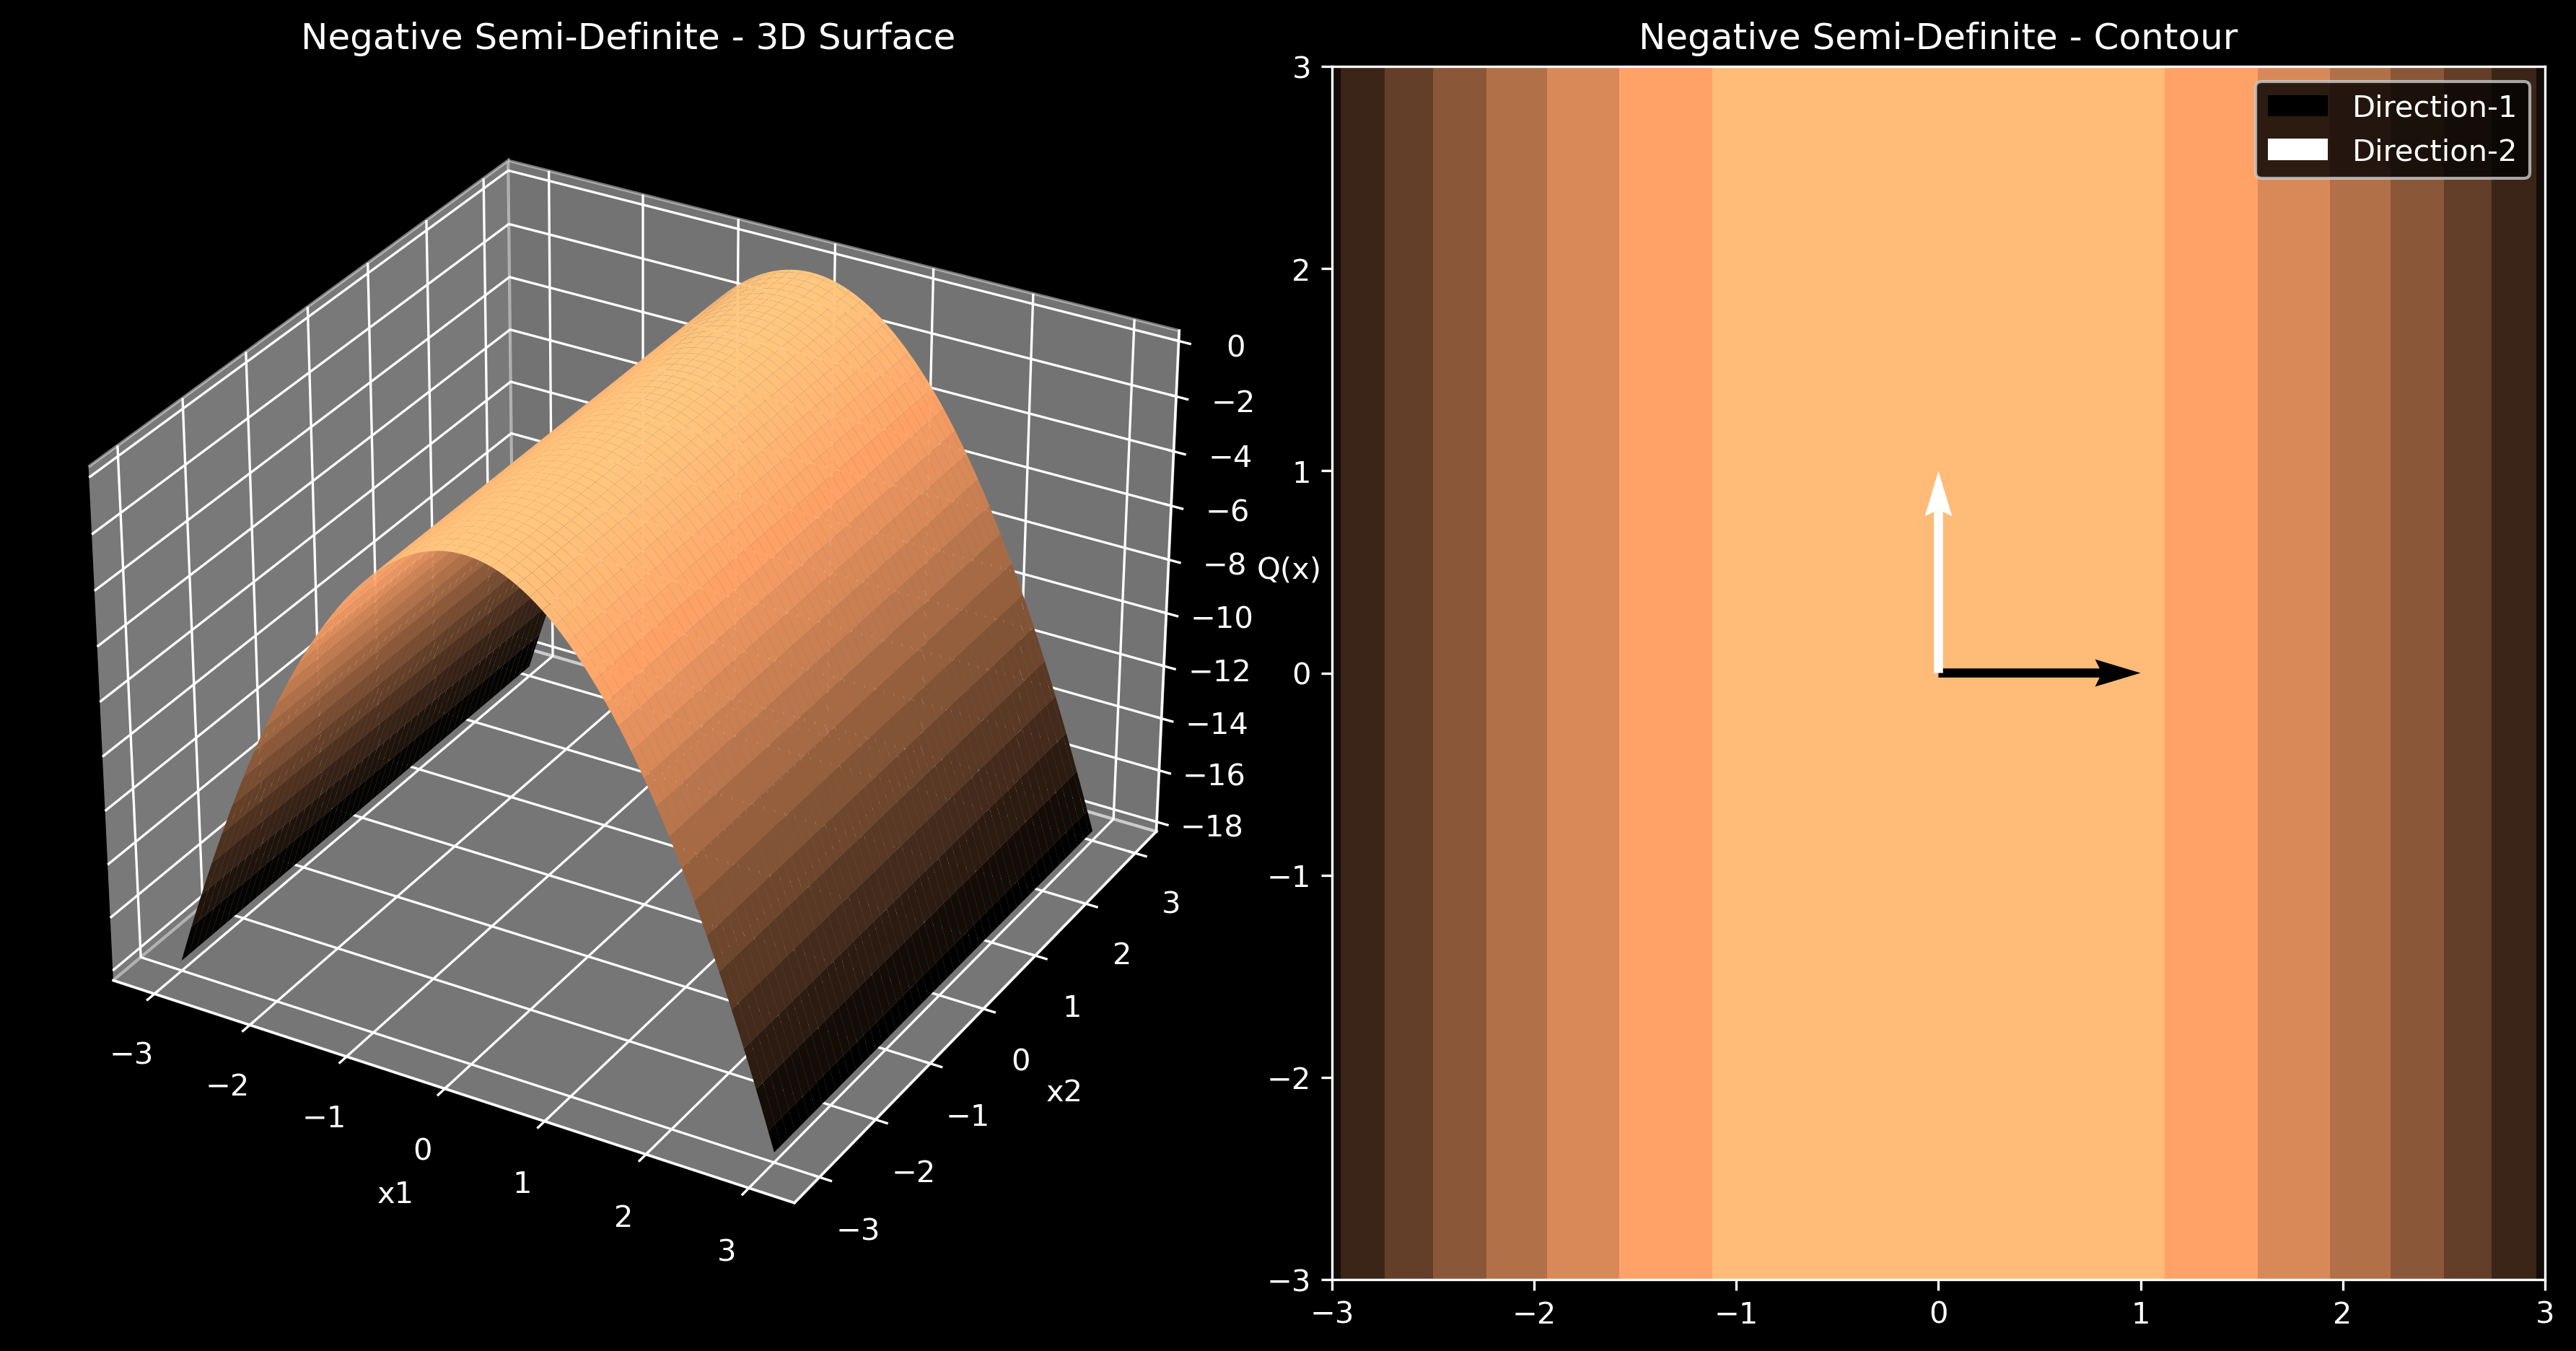

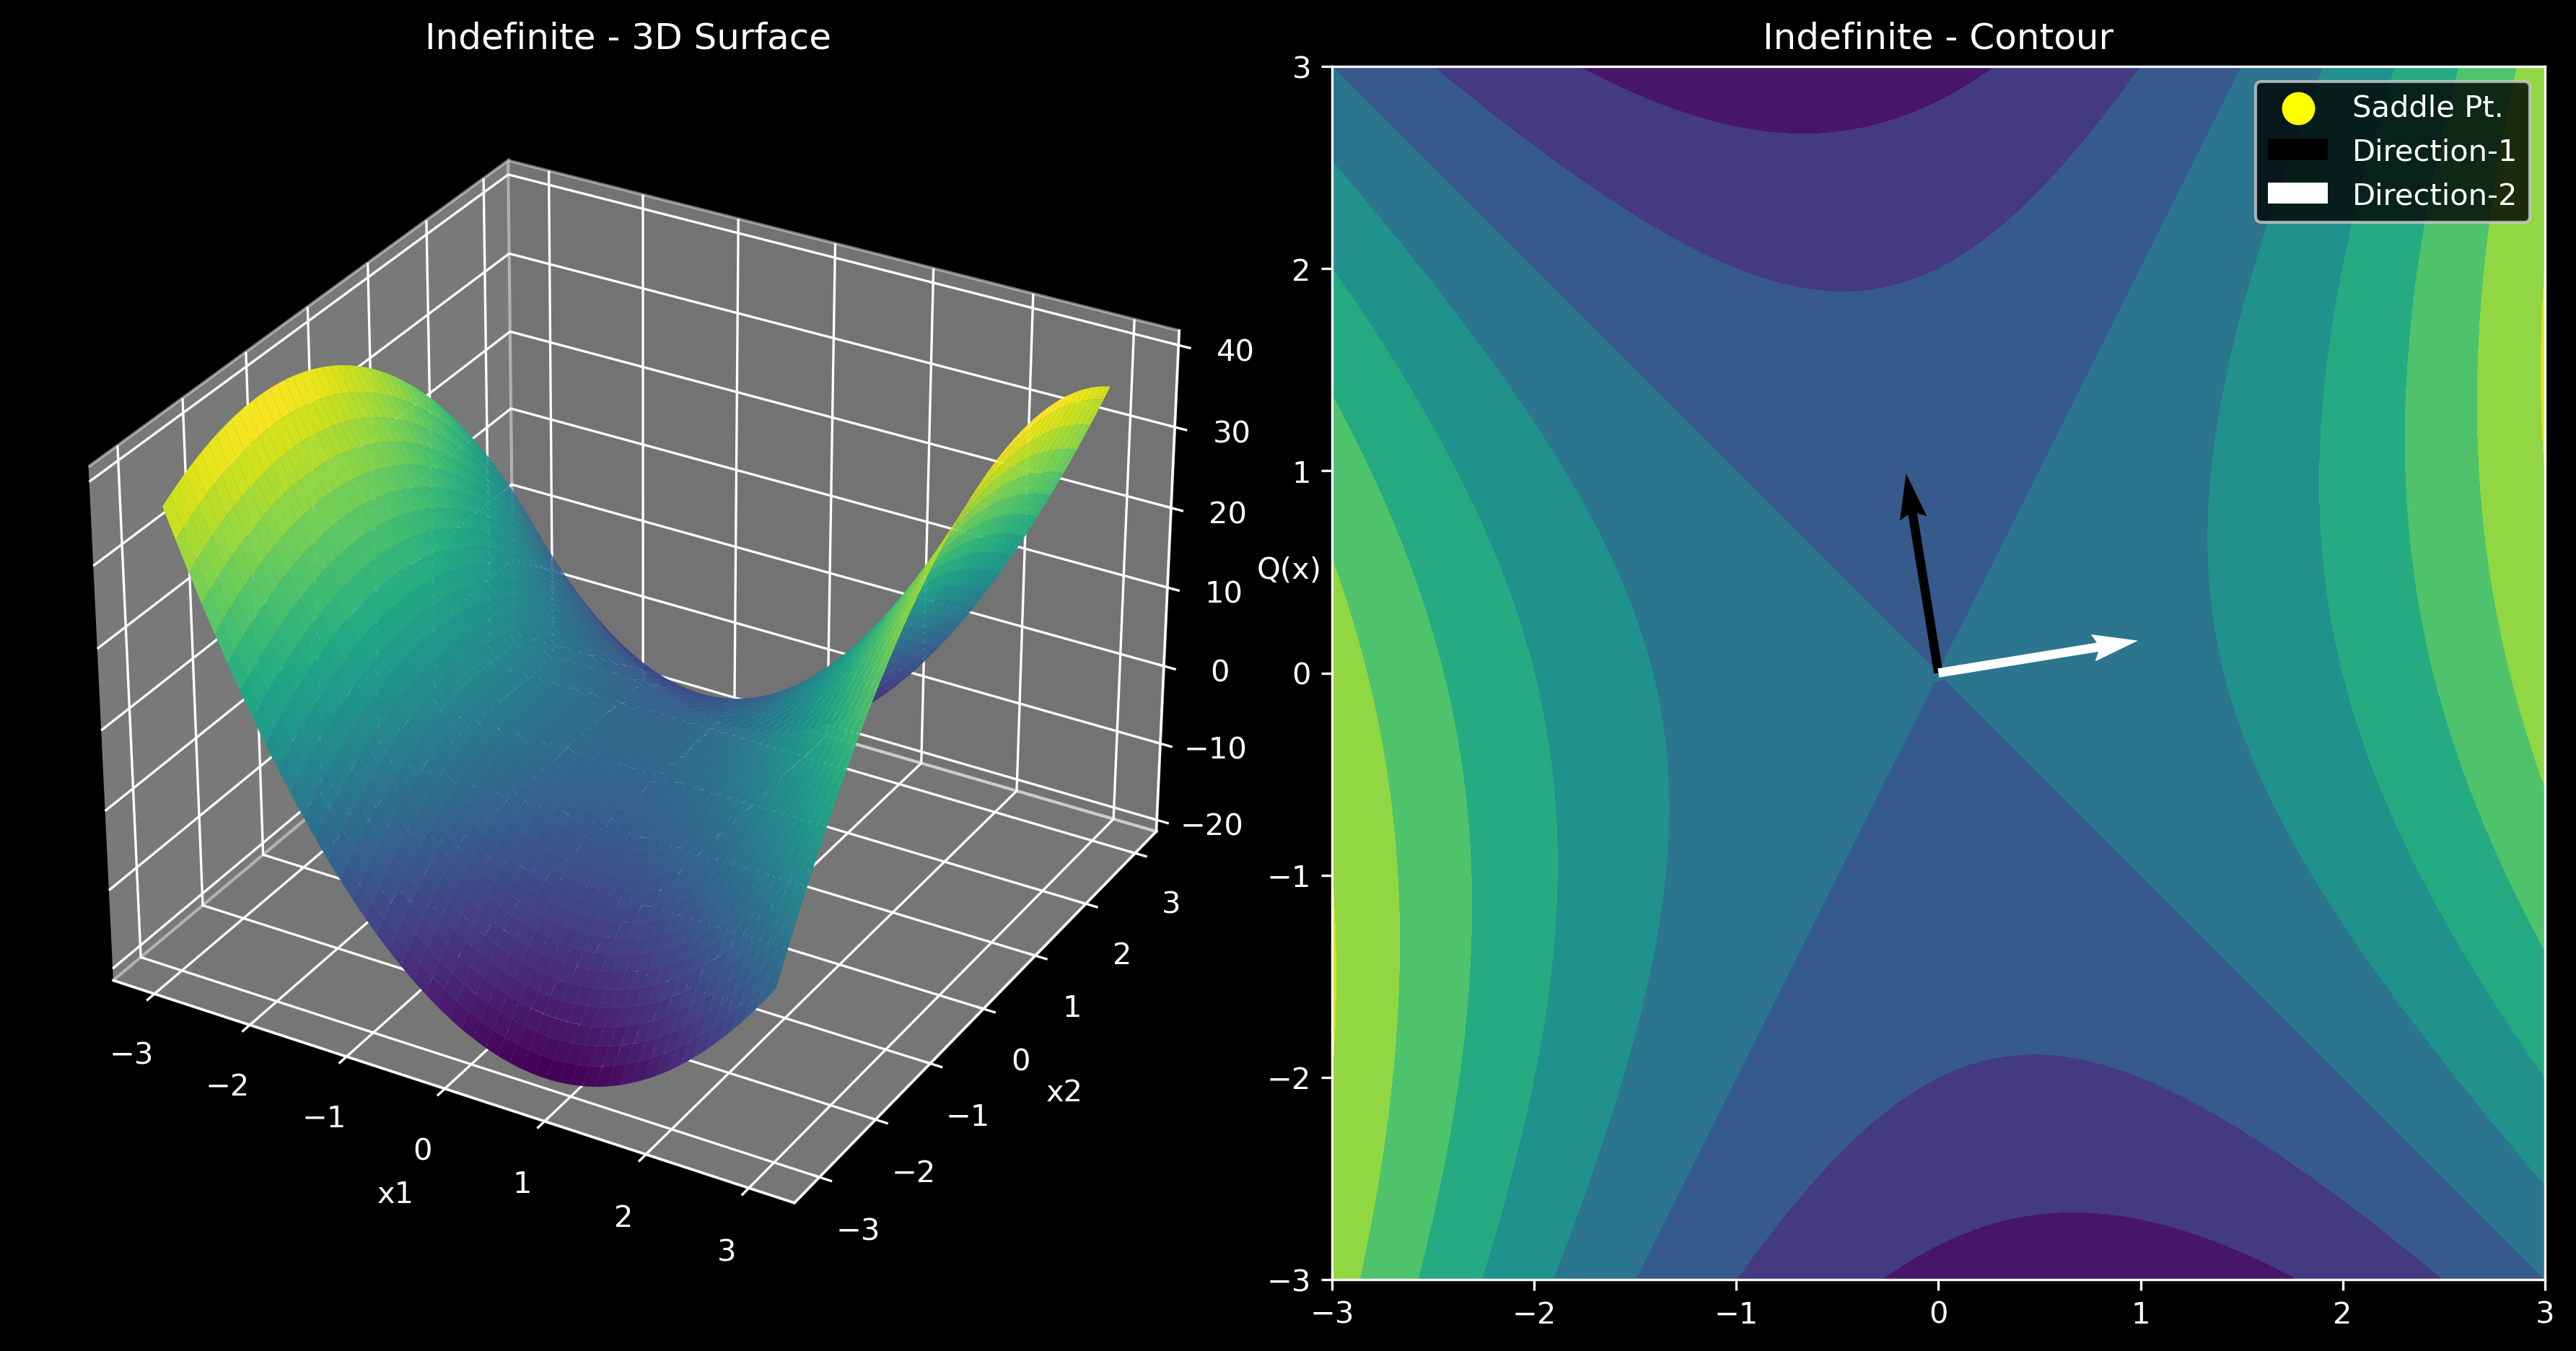

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def create_grid(min_val=-3, max_val=3, num_points=100):
    """
    Create a 2D grid of points for visualization.
    
    Args:
        min_val (float): Minimum value for grid
        max_val (float): Maximum value for grid
        num_points (int): Number of points in each dimension
    
    Returns:
        tuple: Meshgrid of x1 and x2 coordinates
    """
    x1 = np.linspace(min_val, max_val, num_points)
    x2 = np.linspace(min_val, max_val, num_points)
    return np.meshgrid(x1, x2)

def calculate_energy_values(X1, X2, A):
    """
    Calculate energy values for a given quadratic form x'Ax.
    
    Args:
        X1 (np.ndarray): Meshgrid of x1 coordinates
        X2 (np.ndarray): Meshgrid of x2 coordinates
        A (np.ndarray): Symmetric matrix defining the quadratic form
    
    Returns:
        np.ndarray: Energy values for each point in the grid
    """
    Z = np.zeros_like(X1)
    for i in range(X1.shape[0]):
        for j in range(X1.shape[1]):
            point = np.array([X1[i, j], X2[i, j]])
            Z[i, j] = point.T @ A @ point
    return Z

def get_scaled_eigenvectors(A, scale=10):
    """
    Extract and scale eigenvectors from a matrix.
    
    Args:
        A (np.ndarray): Input matrix
        scale (float): Scaling factor for eigenvectors
    
    Returns:
        tuple: Scaled minimum and maximum eigenvector directions
    """
    eigvals, eigvecs = np.linalg.eig(A)
    sorted_indices = np.argsort(eigvals)
    line_min = scale * eigvecs[:, sorted_indices[0]]
    line_max = scale * eigvecs[:, sorted_indices[1]]
    return line_min, line_max

def plot_matrix_energy_visualization(A, title_prefix, cmap='coolwarm', scatter=False, scatter_label='', scatter_color='skyblue'):
    """
    Create a visualization of matrix energy with 3D surface and contour plots.
    
    Args:
        A (np.ndarray): Input matrix to visualize
        title_prefix (str): Prefix for plot titles
        cmap (str): Colormap to use for plotting
        scatter (bool): Whether to display a scatter point
        scatter_label (str): Label for the scatter point
        scatter_color (str): Color for the scatter point
    
    Returns:
        tuple: Figure and axes objects
    """
    plt.style.use('dark_background')
    fig = plt.figure(figsize=(12, 6), dpi=300)
    
    # Create grid
    X1, X2 = create_grid()
    
    # Calculate energy values
    Z = calculate_energy_values(X1, X2, A)
    
    # Get eigenvector directions
    line_min, line_max = get_scaled_eigenvectors(A)
    
    # 3D surface plot
    ax1 = fig.add_subplot(121, projection='3d')  
    ax1.plot_surface(X1, X2, Z, cmap=cmap, edgecolor='none')
    ax1.set_title(f'{title_prefix} - 3D Surface')
    ax1.set_xlabel('x1')
    ax1.set_ylabel('x2')
    ax1.set_zlabel('Q(x)')
    
    # Contour plot
    ax2 = fig.add_subplot(122)
    
    # Plot the scatter point if enabled
    if scatter:
        ax2.scatter(0, 0, color=scatter_color, s=100, label=scatter_label)  # Set color for scatter
    ax2.contourf(X1, X2, Z, cmap=cmap)
    ax2.quiver(0, 0, line_min[0], line_min[1], angles='xy', scale_units='xy', scale=10, color='black', label='Direction-1')
    ax2.quiver(0, 0, line_max[0], line_max[1], angles='xy', scale_units='xy', scale=10, color='white', label='Direction-2')
    ax2.set_title(f'{title_prefix} - Contour')
    ax2.set_aspect('equal')
    ax2.legend()
    
    plt.tight_layout()
    return fig, (ax1, ax2)

def main():
    """
    Main function to demonstrate matrix energy visualizations.
    """
    matrix_info = {
        'Positive Definite': {
            'matrix': np.array([[3, 0.5], [0.5, 2]]),
            'cmap': 'coolwarm',
            'scatter': {'enabled': True, 'label': 'Global Min', 'color': 'skyblue'}
        },
        'Negative Definite': {
            'matrix': np.array([[-2, 0.75], [0.75, -3]]),
            'cmap': 'inferno',
            'scatter': {'enabled': True, 'label': 'Global Max', 'color': 'red'}
        },
        'Positive Semi-Definite': {
            'matrix': np.array([2, 0, 0, 0]).reshape(2, 2),
            'cmap': 'winter',
            'scatter': {'enabled': False, 'label': '', 'color': ''}
        },
        'Negative Semi-Definite': {
            'matrix': np.array([-2, 0, 0, 0]).reshape(2, 2),
            'cmap': 'copper',
            'scatter': {'enabled': False, 'label': '', 'color': ''}
        },
        'Indefinite': {
            'matrix': np.array([[4, 1], [1, -2]]),
            'cmap': 'viridis',
            'scatter': {'enabled': True, 'label': 'Saddle Pt.', 'color': 'yellow'}
        }
    }
    
    # Create plots for each matrix type
    for name, info in matrix_info.items():
        plot_matrix_energy_visualization(
            info['matrix'],
            name,
            cmap=info['cmap'],
            scatter=info['scatter']['enabled'],
            scatter_label=info['scatter']['label'],
            scatter_color=info['scatter']['color']  # Pass color for scatter
        )
    plt.show()

if __name__ == "__main__":
    main()